# Neural Networks in Keras

## Imports

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Deep learning tools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import set_config
set_config(transform_output='pandas')

## Load Data

In [2]:
# import data with id column as idx
df = pd.read_csv('Data/cancer.csv', index_col=0)

In [3]:
# preview data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# check for null values
df.isna().sum().sum()

0

In [5]:
# define X and y
target = 'diagnosis'
X = df.drop(columns = target)
y = df[target]

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Conversion
NNs cannot use string labels. Convert string labels to numbers using LabelEncoder().

In [7]:
# instantiate LabelEncoder()
le = LabelEncoder()

In [8]:
# fit and transform on y train
y_train_enc = le.fit_transform(y_train)

In [9]:
# fit on y test
y_test_enc = le.transform(y_test)

In [10]:
# view transformed y train data as array
y_train_enc

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [11]:
# Convert encoded target values to a series
y_train_enc = pd.Series(le.transform(y_train), index=y_train.index,
             name=target)
y_test_enc = pd.Series(le.transform(y_test), index=y_test.index,
             name=target)
y_train_enc

id
8913         0
915691       1
904689       0
9110732      1
881046502    1
            ..
859711       0
863031       0
8910721      0
908489       1
862965       0
Name: diagnosis, Length: 426, dtype: int32

## Check Class Balance

In [12]:
# Check class balance
y_train_enc.value_counts(normalize = True)

0    0.629108
1    0.370892
Name: diagnosis, dtype: float64

## Scale Data

In [13]:
# instantiate scaler
scaler = StandardScaler()

In [14]:
# fit and transform
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

## Step 1: Build network structure

In [15]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_tf.shape[1]
input_shape

30

### Model Type

In [16]:
# instantiate sequnital model type
model = Sequential()

### Hidden Layers

In [17]:
# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [18]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

## Step 2: Compile Model

In [19]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam',)

In [20]:
# Reviewing the model summary before training to see all the layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


## Step 3: Fit Model

In [21]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_data = (X_test_tf, y_test_enc), 
                    epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 17ms/step - loss: 0.7951 - val_loss: 0.7237
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.6557 - val_loss: 0.6001
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 0.5594 - val_loss: 0.5053
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.4744 - val_loss: 0.4260
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 0.3983 - val_loss: 0.3554
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3328 - val_loss: 0.2939
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2757 - val_loss: 0.2430
Epoch 8/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2318 - val_loss: 0.2011
Epoch 9/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1962 - val_loss: 0.1714
Epoch 10/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1702 - val_loss: 0.1465


In [22]:
# History.history is a dictionary
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [23]:
# Metric value for every training epoch
history.history['loss']

[0.7950681447982788,
 0.6557140946388245,
 0.5593999028205872,
 0.47438132762908936,
 0.398290753364563,
 0.33284810185432434,
 0.2756861448287964,
 0.23178622126579285,
 0.19620069861412048,
 0.170236736536026]

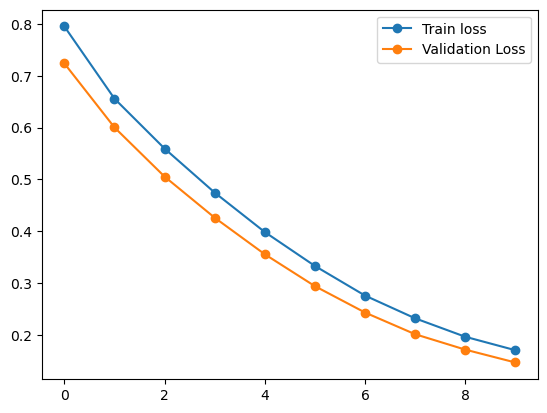

In [24]:
# Visualize the loss
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train loss', marker='o')
ax.plot(history.history['val_loss'], label='Validation Loss', marker='o')
ax.legend();

## Lesson: Evaluating Neural Networks

## Step 1: Define Network Structure

In [25]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

## Step 2: Compile Model (w/additional metrics)

In [26]:
# Metrics are specified during the .compile step
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam'
              , metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision'),
                        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


## Step 3: Fit Model

In [27]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_data = (X_test_tf, y_test_enc), 
                    epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 25ms/step - loss: 0.7948 - accuracy: 0.5610 - recall: 0.9873 - precision: 0.4575 - val_loss: 0.6488 - val_accuracy: 0.6783 - val_recall: 1.0000 - val_precision: 0.5400
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5885 - accuracy: 0.7347 - recall: 0.9620 - precision: 0.5869 - val_loss: 0.5076 - val_accuracy: 0.8112 - val_recall: 1.0000 - val_precision: 0.6667
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4748 - accuracy: 0.8404 - recall: 0.9430 - precision: 0.7163 - val_loss: 0.4105 - val_accuracy: 0.8881 - val_recall: 0.9630 - val_precision: 0.7879
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.3870 - accuracy: 0.8920 - recall: 0.9304 - precision: 0.8077 - val_loss: 0.3400 - val_accuracy: 0.9441 - val_recall: 0.9630 - val_precision: 0.8966
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.3217 - accuracy: 0.9061 - recall: 0.9

### convert to df

In [28]:
# Convert the history to a dataframe for readability
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,recall,precision,val_loss,val_accuracy,val_recall,val_precision
0,0.794833,0.561033,0.987342,0.457478,0.648848,0.678322,1.000000,0.540000
1,0.588463,0.734742,0.962025,0.586873,0.507560,0.811189,1.000000,0.666667
2,0.474776,0.840376,0.943038,0.716346,0.410492,0.888112,0.962963,0.787879
3,0.387000,0.892019,0.930380,0.807692,0.340006,0.944056,0.962963,0.896552
4,0.321725,0.906103,0.930380,0.835227,0.283486,0.965035,0.981481,0.929825
5,0.269340,0.936620,0.930380,0.901841,0.235871,0.965035,0.981481,0.929825
6,0.226326,0.953052,0.930380,0.942308,0.198223,0.965035,0.981481,0.929825
7,0.193070,0.964789,0.930380,0.973510,0.170450,0.965035,0.981481,0.929825
8,0.168229,0.969484,0.936709,0.980132,0.147852,0.965035,0.981481,0.929825
9,0.148610,0.974178,0.949367,0.980392,0.132266,0.965035,0.981481,0.929825


## Custom Functions

In [29]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):
       
    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]
    
    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)
    
    # For each metric
    for i, metric_name in enumerate(metrics):
    
        # Get the axis for the current metric
        ax = axes[i]
    
        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch
    
        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)
    
        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)
    
        # Final subplot adjustments 
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

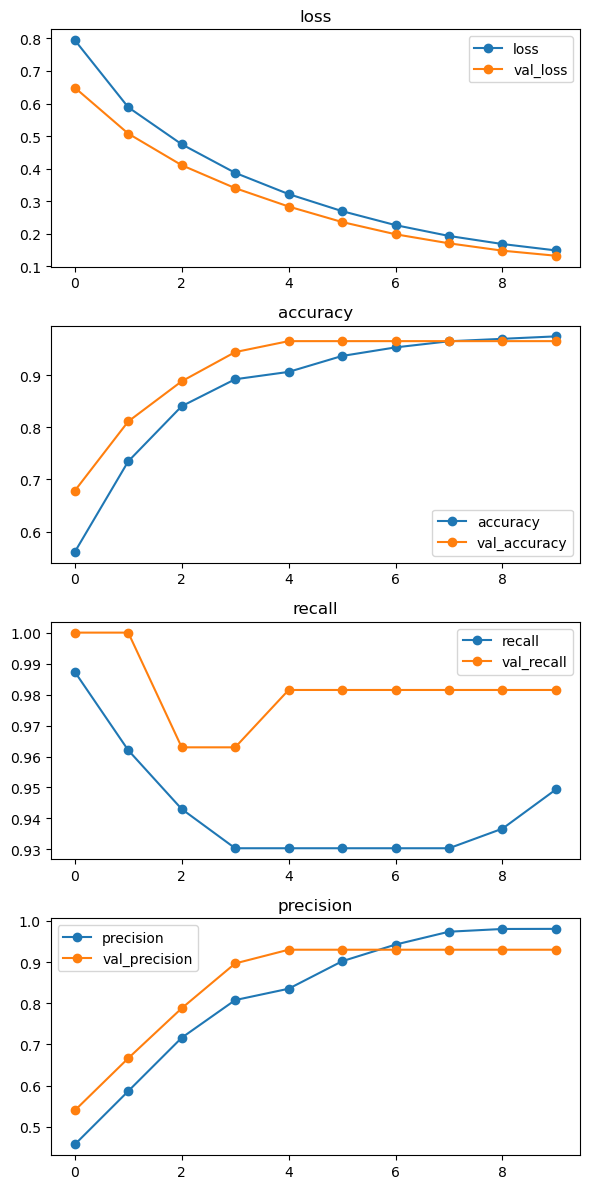

In [31]:
# call custom function
plot_history(history);

## Final Test Scores

### Step 1 and 2

In [32]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

### Metrics are specified during the.compile step
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam'
              , metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision'),
                        ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


### Step 3: Fit with Validation Split (instead of validation_data)

Epoch 1/10
11/11 [==============================] - 1s 47ms/step - loss: 0.5064 - accuracy: 0.8382 - recall: 0.5984 - precision: 0.9500 - val_loss: 0.4357 - val_accuracy: 0.9186 - val_recall: 0.8387 - val_precision: 0.9286
Epoch 2/10
11/11 [==============================] - 0s 8ms/step - loss: 0.4083 - accuracy: 0.9147 - recall: 0.7953 - precision: 0.9712 - val_loss: 0.3524 - val_accuracy: 0.9535 - val_recall: 0.9032 - val_precision: 0.9655
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 0.3342 - accuracy: 0.9324 - recall: 0.8425 - precision: 0.9727 - val_loss: 0.2924 - val_accuracy: 0.9535 - val_recall: 0.9032 - val_precision: 0.9655
Epoch 4/10
11/11 [==============================] - 0s 14ms/step - loss: 0.2761 - accuracy: 0.9412 - recall: 0.8661 - precision: 0.9735 - val_loss: 0.2400 - val_accuracy: 0.9767 - val_recall: 0.9355 - val_precision: 1.0000
Epoch 5/10
11/11 [==============================] - 0s 10ms/step - loss: 0.2293 - accuracy: 0.9529 - recall: 

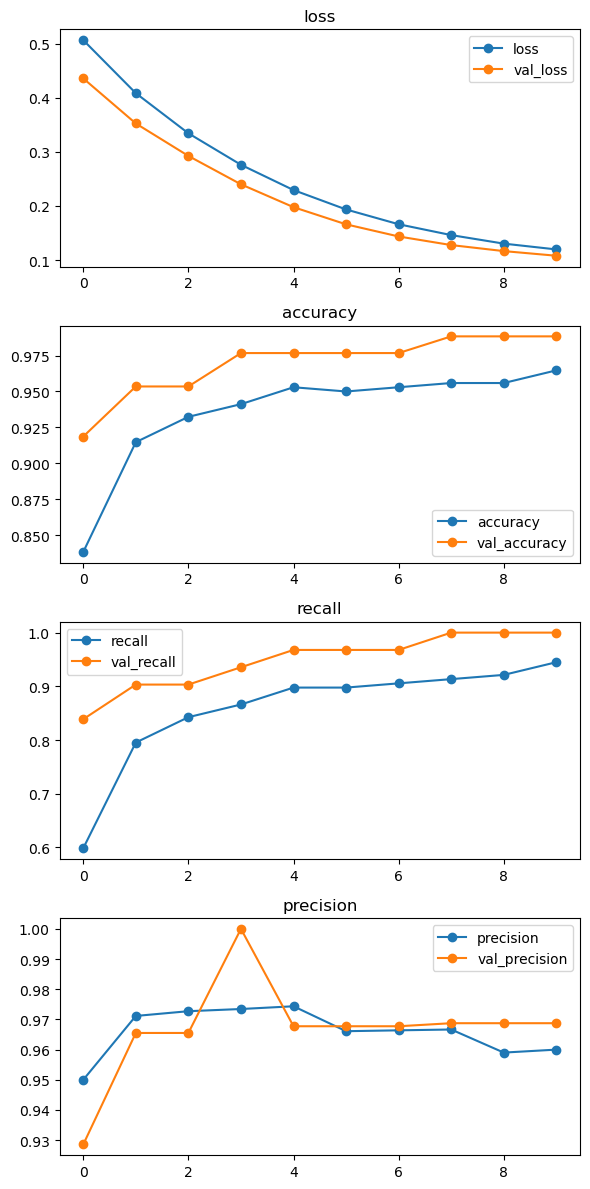

In [33]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_split=.2, 
                    epochs=10)

plot_history(history);

## Final Evaluation using model.evaluate

In [34]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_tf, y_test_enc,return_dict=True)
result

5/5 [==============================] - 0s 3ms/step - loss: 0.0918 - accuracy: 0.9720 - recall: 0.9630 - precision: 0.9630


{'loss': 0.091763935983181,
 'accuracy': 0.9720279574394226,
 'recall': 0.9629629850387573,
 'precision': 0.9629629850387573}

In [35]:
# make predictions
y_pred_test = model.predict(X_test_tf)
y_pred_test[:5]

5/5 [==============================] - 0s 2ms/step


array([[0.21926308],
       [0.9715062 ],
       [0.8808455 ],
       [0.04955391],
       [0.01474982]], dtype=float32)

In [36]:
# round the predictions so that sklearn can use them for evaluation (sk can't handle floats)
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



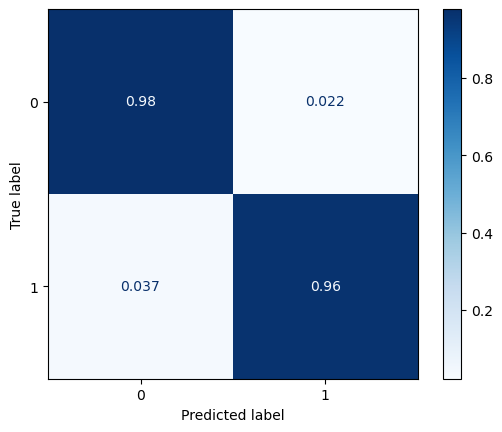

In [38]:
# ConfusionMatrixDisplay.from_estimator() can’t use a Keras model to create a confusion matrix, so we will use the ConfusionMatrixDisplay.from_predictions() method to create our confusion matrix heatmap.​
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test_enc, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred_test, cmap='Blues',
                                       normalize='true');